**Интерполяция**

In [4]:
import numpy as np
from PIL import Image as pim

In [5]:
input_image = pim.open("img1.png")
input_array = np.array(input_image)

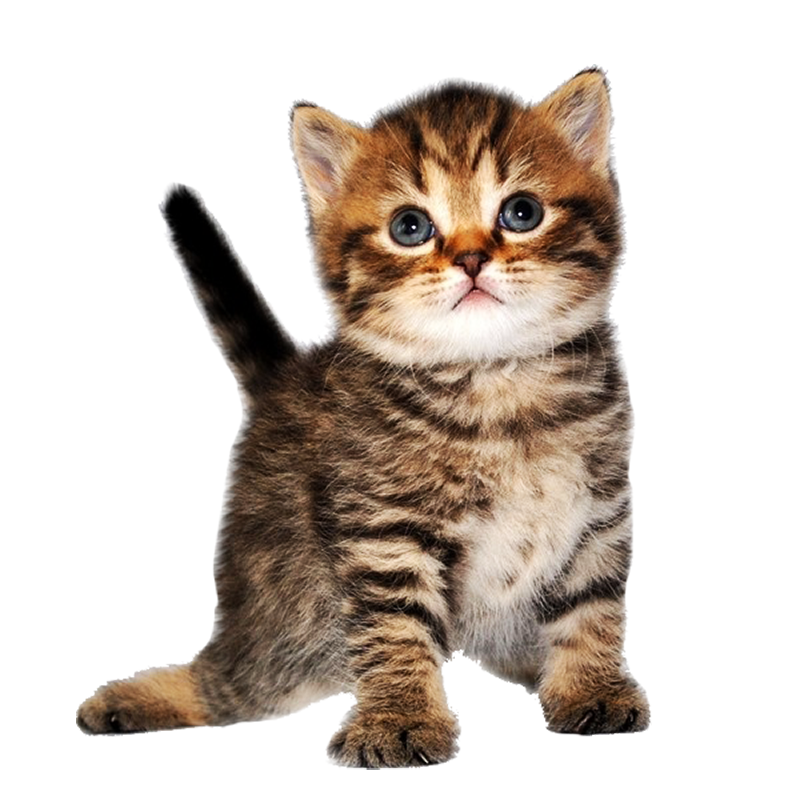

In [6]:
input_image

In [7]:
def interpolation(image, M):
  image_array = image.load()
  height, width = image.size[0], image.size[1]
  new_height, new_width = height * M, width * M
  result_image = pim.new('RGB', (new_height, new_width))
  result_array = result_image.load()
  for x in range(height):
    for y in range(width):
      for step_x in range(M):
        for step_y in range(M):
          result_array[x * M + step_x, y * M + step_y] = image_array[x, y]
  return result_image

In [8]:
interpolation(input_image, 10)

**Децимация**

In [9]:
def decimation(image, N):
  input_data = image.load()
  h0, w0 = image.size
  h1, w1 = h0//N, w0//N
  result_image = pim.new('RGB', (h1, w1))
  result_data = result_image.load()
  for x in range(h1):
    for y in range(w1):
      result_data[x, y] = input_data[x * N, y * N]
  return result_image

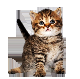

In [10]:
decimation(input_image, 10)

**Передискретизация в 2 прохода**


In [11]:
def oversampling_by_two(image, M, N):
  return decimation(interpolation(image, M), N)

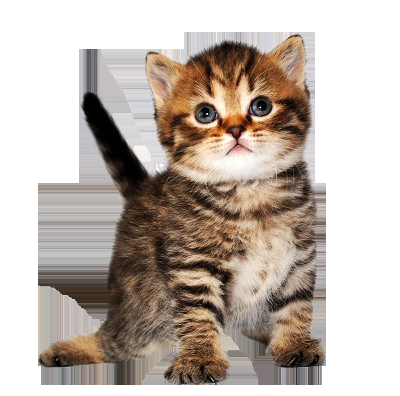

In [12]:
oversampling_by_two(input_image, 1, 2)

**Передискретизация в K проходов**

In [13]:
def oversampling(image, M, N):
  input_data = image.load()
  h0, w0 = image.size
  h1, w1 = h0*M//N, w0*M//N

  result_image = pim.new('RGB', (h1, w1))
  result_data = result_image.load()

  for x in range(h1):
    for y in range(w1):
      result_data[x, y] = input_data[x*N//M, y*N//M]
  return result_image

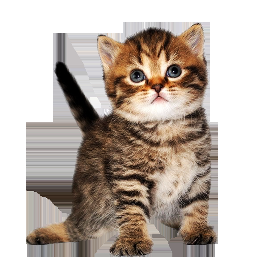

In [15]:
oversampling(input_image, 1, 3)